In [15]:
!pip install pandas
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
text = pd.read_csv ('text.csv')
text

,WORDNO,WORD
0,1,katekizmas
1,2,arba
2,3,mokslas
3,4,kiekvienam
4,5,krikščioniui
...,...,...
16575,16576,amžių
16576,16577,amžinų
16577,16578,","
16578,16579,amen


In [28]:
vocab = pd.read_csv ('vocab.csv')
vocab

,WORD,POS
0,***,***
1,",",-
2,-,-
3,.,-
4,?,-
...,...,...
3963,žymę,NaN
3964,žyminame,V
3965,žynauja,V
3966,žyvate,NaN


In [85]:
df = text.merge(vocab, on='WORD', how='inner')
df

,WORDNO,WORD,POS
0,1,katekizmas,NaN
1,2,arba,KO
2,678,arba,KO
3,702,arba,KO
4,837,arba,KO
...,...,...,...
19417,16543,pataisyti,V
19418,16552,pildymo,NaN
19419,16556,atitraukti,V
19420,16562,didėsės?didesnės?,NaN


In [86]:
duplicate = df[df.duplicated('POS')] #понимаю, что не совсем то
duplicate

,WORDNO,WORD,POS
2,678,arba,KO
3,702,arba,KO
4,837,arba,KO
5,1052,arba,KO
6,1202,arba,KO
...,...,...,...
19417,16543,pataisyti,V
19418,16552,pildymo,NaN
19419,16556,atitraukti,V
19420,16562,didėsės?didesnės?,NaN


<Axes: xlabel='POS'>

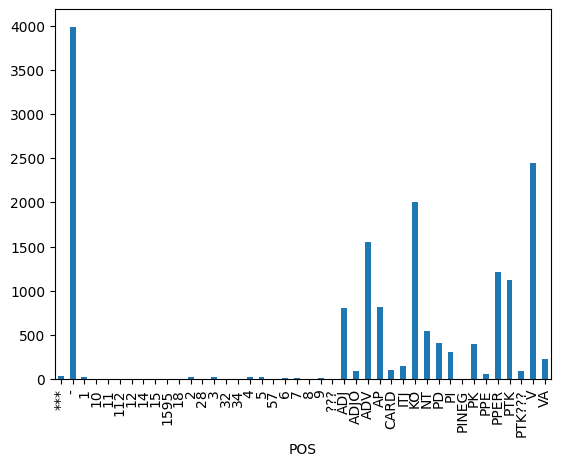

In [87]:
import matplotlib.pyplot as plt

grouped = df.groupby("POS")['WORD'].count() #пыталась вычислить кол-во слов по каждой чр
grouped.plot(kind='bar')


In [93]:
r_list = []

for i in df.groupby("POS"):
    
    r_list.append([k for k in pd.Series([len(j) for j in i[1]["WORD"]]).rolling(window = 10).mean()])

for i in r_list:
   print(i)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.0, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.7, 1.7, 2.0, 2.2, 2.1, 2.0, 1.9, 1.8, 1.7, 1.6, 1.6, 1.6, 1.3, 1.0, 1.0, 1.0, 1.2]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

In [113]:
r_mean = pd.DataFrame(r_list)
r_mean

#r_mean.to_html('mean.html')

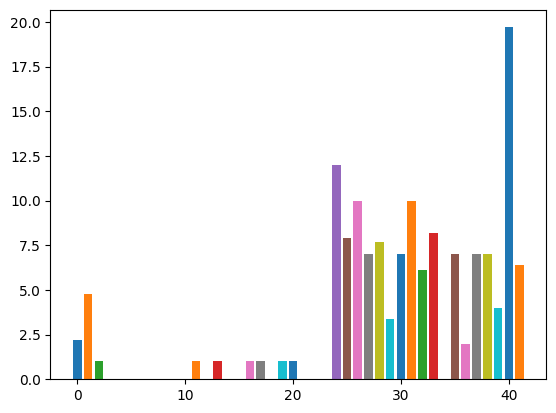

In [117]:
for i in r_mean.T:
    plt.bar(i, r_mean.loc[i])